<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/CNN_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sentence_test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shared Tasl/Copy of Test_data_with_labels - test_data.csv')
sentence_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shared Tasl/train_data (1).csv')
sentence_val= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shared Tasl/dev_data.csv')

In [4]:
print(f"#examples in training set:{ sentence_train.shape[0]}\n#examples in validation set:{ sentence_val.shape[0]}\n#examples in test set:{ sentence_test.shape[0]}")


#examples in training set:7201
#examples in validation set:3245
#examples in test set:499


In [5]:
sentence_test

,Pid,text,labels
0,test_id_1,"This is me. Don鈥檛 get me wrong, it鈥檚 better th...",moderate
1,test_id_2,I hate that people don鈥檛 understand that i don...,severe
2,test_id_3,"But here I am, 24 years old man and doing exac...",moderate
3,test_id_4,I鈥檓 trapped inside. Does anyone else get that ...,moderate
4,test_id_5,I read a lot of posts on here of people strugg...,moderate
...,...,...,...
494,test_id_495,I'm 14\nmy mom doesn't take my mental health s...,severe
495,test_id_496,I was quite shocked at their reactions. I sort...,moderate
496,test_id_497,Lying on my bed..... fantasising another life ...,not depression
497,test_id_498,"I was bullied in elementary school, and I alwa...",moderate


In [6]:
train_text = sentence_train.text.tolist()
train_labels = sentence_train.labels.tolist()

val_text = sentence_val.text.tolist()
val_labels = sentence_val.labels.tolist()

test_text = sentence_test.text.tolist()
test_labels = sentence_test.labels.tolist()

In [7]:
number_of_classes =3

In [8]:
%%time
max_words = 1000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(train_text)

CPU times: user 1.6 s, sys: 6.6 ms, total: 1.61 s
Wall time: 1.67 s


In [9]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

21626
CPU times: user 154 µs, sys: 0 ns, total: 154 µs
Wall time: 121 µs


# Frequency Distribution of Data Length

In [10]:
Length_frequency = {}

for i in range(len(train_text)):
     index = len(train_text[i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1

Text(0.5, 1.0, 'Length-Frequency Distribution')

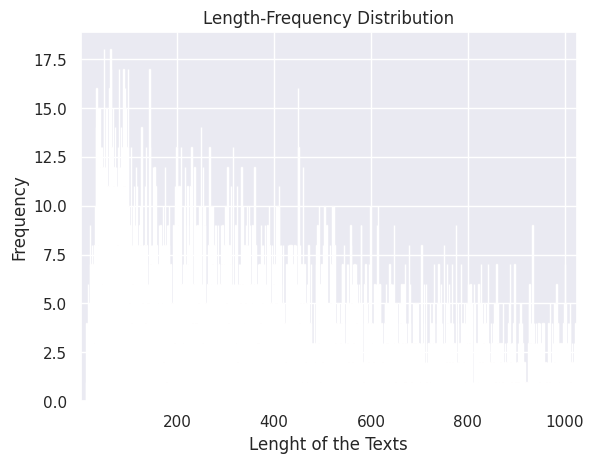

In [11]:

import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='r')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

In [12]:

%%time
# Convert string into list of integer indices
train_sequences = tokenizer.texts_to_sequences(train_text)
val_sequences = tokenizer.texts_to_sequences(val_text)
test_sequences = tokenizer.texts_to_sequences(test_text)

CPU times: user 2.02 s, sys: 13.3 ms, total: 2.03 s
Wall time: 3.41 s


In [13]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# print(dataset['cleaned'][3])
# print(sequences[1])

Found 21626 unique tokens.


In [14]:
%%time
## Before padding length of different training examples
mx = len(train_sequences[0])
for x in train_sequences:
  mx =max(mx, len(x))
print("Maximum Text length",mx)
from tensorflow.keras.preprocessing.sequence import pad_sequences

##We can also determine maxlen by plotting the frequency distribution of the lengths
train_pad = pad_sequences(train_sequences, value=0.0, padding='post', maxlen= 200)
## We get the maxlen value from the Length frequency distribution
val_pad = pad_sequences(val_sequences, value=0.0, padding='post', maxlen= 200)
test_pad = pad_sequences(test_sequences, value=0.0, padding='post', maxlen= 200)

print(train_pad[1])

Maximum Text length 4169
[  5 161  88  24 324  39   5 829 136   6   3  40   1 170 380  46   6 222
 315 124  97  24  26 743  18  17 162 110  24  26 615  14   6 179  13   6
 222 315   7  15  29   1  32   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
CPU times: user 158 ms, sys: 6.68 ms, total: 164 ms
Wall time: 190 ms


In [15]:
print("Shape of the train set: ", train_pad.shape)

# for i in range(2):
#     print(dataset['cleaned'][i],"\n",corpus[i])

Shape of the train set:  (7201, 200)


# CNN with Keras Embedding

In [16]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [17]:
from sklearn.preprocessing import LabelEncoder

# Convert train_labels and val_labels to strings
train_labels = [str(label) for label in train_labels]
val_labels = [str(label) for label in val_labels]
test_labels = [str(label) for label in test_labels]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the combined labels
combined_labels = train_labels + val_labels+test_labels
label_encoder.fit(combined_labels)

# Transform the training labels
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the validation labels
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded=label_encoder.transform(test_labels)


In [18]:

''' Callbacks with Checkpoint'''

accuracy_threshold1 = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold1):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold1*100))
        self.model.stop_training = True

acc_callback1 = myCallback()
  # Saved the Best Model
filepath = "mymodel5.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list1= [acc_callback1, checkpoint]

In [19]:
from keras.utils import to_categorical

# Convert labels to one-hot encoding
train_labels_encoded = to_categorical(train_labels_encoded, num_classes=number_of_classes)
val_labels_encoded = to_categorical(val_labels_encoded, num_classes=number_of_classes)


In [20]:
keras.backend.clear_session()

max_length = 200
embedding_dim = 64
number_of_classes = 3
# define CNN model

def CNN():

  input = Input(shape=(max_length,))
  embedding = Embedding(max_words, embedding_dim, input_length = 200)(input)
  conv1 = Conv1D(32,2,activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(3, activation='softmax')(flat)
  model = Model(inputs=input, outputs=output_layer)

  return model

# call the model
cnn_model = CNN()

cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 64)           64000     
                                                                 
 conv1d (Conv1D)             (None, 199, 32)           4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3168)              0         
                                                                 
 dense (Dense)               (None, 3)                 9507      
                                                             

In [21]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 64)           64000     
                                                                 
 conv1d (Conv1D)             (None, 199, 32)           4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3168)              0         
                                                                 
 dense (Dense)               (None, 3)                 9507      
                                                             

In [22]:
history5 = cnn_model.fit(train_pad, train_labels_encoded, epochs=10, batch_size=32, verbose=1, validation_data=(val_pad, val_labels_encoded), callbacks=callback_list1)


Epoch 1/10
224/226 [============================>.] - ETA: 0s - loss: 0.8945 - accuracy: 0.5760
Epoch 1: val_accuracy improved from -inf to 0.62188, saving model to mymodel5.h5
226/226 [==============================] - 5s 19ms/step - loss: 0.8947 - accuracy: 0.5756 - val_loss: 0.8205 - val_accuracy: 0.6219
Epoch 2/10
224/226 [============================>.] - ETA: 0s - loss: 0.8226 - accuracy: 0.6145
Epoch 2: val_accuracy improved from 0.62188 to 0.65701, saving model to mymodel5.h5
226/226 [==============================] - 5s 24ms/step - loss: 0.8229 - accuracy: 0.6144 - val_loss: 0.7675 - val_accuracy: 0.6570
Epoch 3/10
225/226 [============================>.] - ETA: 0s - loss: 0.7097 - accuracy: 0.6812
Epoch 3: val_accuracy did not improve from 0.65701
226/226 [==============================] - 3s 14ms/step - loss: 0.7097 - accuracy: 0.6813 - val_loss: 0.8313 - val_accuracy: 0.6055
Epoch 4/10
224/226 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7702
Epoc

In [23]:
model112 = load_model("mymodel5.h5")

In [24]:
y_pred112 = np.argmax(model112.predict(test_pad), axis=-1)
y_pred112

16/16 [==============================] - 0s 4ms/step


array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [26]:
print(classification_report(test_labels_encoded,y_pred112))

              precision    recall  f1-score   support

           0       0.56      0.76      0.64       275
           1       0.39      0.37      0.38       135
           2       0.00      0.00      0.00        89

    accuracy                           0.52       499
   macro avg       0.32      0.38      0.34       499
weighted avg       0.41      0.52      0.46       499



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN+BiLSTM


In [27]:
from keras.layers import Embedding, SpatialDropout1D, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Flatten, Dense
from keras.models import Sequential

keras.backend.clear_session()

max_length = 200
embedding_dim = 64
number_of_classes = 3

# Define CNN + LSTM model
model_cl1 = Sequential()
model_cl1.add(Embedding(max_words, embedding_dim, input_length=max_length, trainable=True))
#model_cl.add(SpatialDropout1D(0.8))
#model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
#model_cl.add(MaxPooling1D(pool_size=2))
model_cl1.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model_cl1.add(MaxPooling1D(pool_size=2))
model_cl1.add(Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
#model_cl.add(Dropout(0.5))
#model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
#model_cl.add(Dropout(0.5))
model_cl1.add(Flatten())
model_cl1.add(Dense(64, activation='relu'))
#model_cl.add(Dropout(0.5))
model_cl1.add(Dense(number_of_classes, activation='softmax'))
model_cl1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_cl1.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           64000     
                                                                 
 conv1d (Conv1D)             (None, 199, 32)           4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 99, 64)           16640     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 6336)              0         
                                                                 
 dense (Dense)               (None, 64)                4

In [33]:
model_cl1.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])


In [29]:
from sklearn.preprocessing import LabelEncoder

# Convert train_labels and val_labels to strings
train_labels = [str(label) for label in train_labels]
val_labels = [str(label) for label in val_labels]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the combined labels
combined_labels = train_labels + val_labels
label_encoder.fit(combined_labels)

# Transform the training labels
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the validation labels
val_labels_encoded = label_encoder.transform(val_labels)


In [30]:

''' Callbacks with Checkpoint'''

accuracy_threshold1 = 0.99

class myCallback1(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold1):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold1*100))
        self.model.stop_training = True

acc_callback2 = myCallback1()
  # Saved the Best Model
filepath = "mymodel_kell.h5"
checkpoint2 = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list1= [acc_callback2, checkpoint2]

In [31]:
history1= model_cl1.fit(train_pad, train_labels_encoded, epochs=10, batch_size=32, verbose=1, validation_data=(val_pad, val_labels_encoded), callbacks=callback_list1)


Epoch 1/10
226/226 [==============================] - ETA: 0s - loss: 0.8987 - accuracy: 0.5789
Epoch 1: val_accuracy improved from -inf to 0.65948, saving model to mymodel_kell.h5
226/226 [==============================] - 72s 287ms/step - loss: 0.8987 - accuracy: 0.5789 - val_loss: 0.7853 - val_accuracy: 0.6595
Epoch 2/10
226/226 [==============================] - ETA: 0s - loss: 0.8251 - accuracy: 0.6142
Epoch 2: val_accuracy did not improve from 0.65948
226/226 [==============================] - 71s 314ms/step - loss: 0.8251 - accuracy: 0.6142 - val_loss: 0.9486 - val_accuracy: 0.5461
Epoch 3/10
226/226 [==============================] - ETA: 0s - loss: 0.7558 - accuracy: 0.6484
Epoch 3: val_accuracy did not improve from 0.65948
226/226 [==============================] - 61s 270ms/step - loss: 0.7558 - accuracy: 0.6484 - val_loss: 0.9277 - val_accuracy: 0.4915
Epoch 4/10
226/226 [==============================] - ETA: 0s - loss: 0.6829 - accuracy: 0.6841
Epoch 4: val_accuracy did n

In [34]:
model6 = load_model("mymodel_kell.h5")

In [35]:
y_pred6 = np.argmax(model6.predict(test_pad), axis=-1)
y_pred6

16/16 [==============================] - 1s 29ms/step


array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
print(classification_report(test_labels_encoded,y_pred6))

              precision    recall  f1-score   support

           0       0.56      0.81      0.66       275
           1       0.38      0.29      0.33       135
           2       0.00      0.00      0.00        89

    accuracy                           0.53       499
   macro avg       0.31      0.37      0.33       499
weighted avg       0.41      0.53      0.45       499



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BiLSTM

In [37]:

''' Callbacks with Checkpoint'''

accuracy_threshold1 = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold1):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold1*100))
        self.model.stop_training = True

acc_callback0 = myCallback()
  # Saved the Best Model
filepath = "mymodel000.h5"
checkpoint0 = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list0= [acc_callback0, checkpoint0]

In [38]:
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from keras.layers import Input, Dense, Embedding
import keras.callbacks

max_length = 200
embedding_dim = 64
number_of_classes = 3

# Define BiLSTM model
def lstm():
    bi_text_inputs = Input(shape=(max_length,))
    bi_embedding_layer = Embedding(max_words, embedding_dim, trainable=True, input_length=max_length)(bi_text_inputs)
    LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
    bi_dense_layer_1 = Dense(number_of_classes, activation='softmax')(LSTM_Layer_1)
    bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)
    return bilstm_model

# Create the BiLSTM model with the embedding matrix
lstm_model = lstm()

# Print the model summary
lstm_model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 64)           64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 89,027
Trainable params: 89,027
Non-trainable params: 0
_________________________________________________________________


In [39]:
lstm_model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])


In [40]:

%%time
history4 = lstm_model.fit(train_pad,
                              train_labels_encoded,
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_data=(val_pad, val_labels_encoded),
                              callbacks = callback_list0)

Epoch 1/10
226/226 [==============================] - ETA: 0s - loss: 0.9085 - accuracy: 0.5663
Epoch 1: val_accuracy improved from -inf to 0.59353, saving model to mymodel000.h5
226/226 [==============================] - 57s 226ms/step - loss: 0.9085 - accuracy: 0.5663 - val_loss: 0.8509 - val_accuracy: 0.5935
Epoch 2/10
226/226 [==============================] - ETA: 0s - loss: 0.8222 - accuracy: 0.6176
Epoch 2: val_accuracy did not improve from 0.59353
226/226 [==============================] - 49s 216ms/step - loss: 0.8222 - accuracy: 0.6176 - val_loss: 0.8388 - val_accuracy: 0.5852
Epoch 3/10
226/226 [==============================] - ETA: 0s - loss: 0.7569 - accuracy: 0.6569
Epoch 3: val_accuracy improved from 0.59353 to 0.61757, saving model to mymodel000.h5
226/226 [==============================] - 46s 203ms/step - loss: 0.7569 - accuracy: 0.6569 - val_loss: 0.7906 - val_accuracy: 0.6176
Epoch 4/10
226/226 [==============================] - ETA: 0s - loss: 0.7117 - accuracy: 0

In [41]:
model4 = load_model("mymodel000.h5")

In [42]:
y_pred4 = np.argmax(model4.predict(test_pad), axis=-1)
y_pred4

16/16 [==============================] - 2s 57ms/step


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0,

In [43]:
print(classification_report(test_labels_encoded,y_pred4))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       275
           1       0.35      0.47      0.40       135
           2       0.43      0.07      0.12        89

    accuracy                           0.47       499
   macro avg       0.44      0.38      0.36       499
weighted avg       0.47      0.47      0.44       499



CNN with pretrained Glove Word Embedding

In [44]:
# download pretrained glove vectors
!wget -O bangla-glove-300d.zip https://www.dropbox.com/s/l70hvnely4y0pbm/bn_glove.39M.300d.zip?dl=

--2023-08-15 17:17:40--  https://www.dropbox.com/s/l70hvnely4y0pbm/bn_glove.39M.300d.zip?dl=
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l70hvnely4y0pbm/bn_glove.39M.300d.zip [following]
--2023-08-15 17:17:40--  https://www.dropbox.com/s/raw/l70hvnely4y0pbm/bn_glove.39M.300d.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb02c4747ccfc1b9540ab8f960b.dl.dropboxusercontent.com/cd/0/inline/CB2yIVu4u3gFQ4d1jUEO-tSTuyqO7J3zAUBHaPTRtZJhdvcIlKoo5i4Cyrcapf1QqMciiHLarTSton68p_All6G98Zp4tz_UH-yoMABaUfpX9hL5VudgkpyVqXHbSolYJZMSUoztxzGmFq2UvMm-ZB2C/file# [following]
--2023-08-15 17:17:41--  https://ucb02c4747ccfc1b9540ab8f960b.dl.dropboxusercontent.com/cd/0/inline/CB2yIVu4u3gFQ4d1jUEO-tSTuyqO7J3zAUBHaPTRtZJhdvcIlKoo5i4Cyrcapf1QqMciiHL

In [45]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("bangla-glove-300d.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

In [46]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file='bn_glove.39M.300d.txt', word2vec_output_file="gensim_glove_vectors.txt")


<ipython-input-46-18fbf809732b>:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file='bn_glove.39M.300d.txt', word2vec_output_file="gensim_glove_vectors.txt")


(178153, 300)

In [47]:
from gensim.models import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [50]:
#Creating Embeding Matrix
max_words = 100000 # Most frequent 100000 words (It should be initialize during tokenization process)
embedding_dim = 300 # embedding dimension of the model

embedding_matrix = np.zeros((max_words, embedding_dim), dtype = float)

c = 0
word_to_vec_map = {}
for word, i in word_index.items():
    if i < max_words:
      embedding_vector = word_to_vec_map.get(word)
      if embedding_vector is None:
          c +=1;
          #print(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Words not found in the pretrained model is assigned as zeros
print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)

Number of words not in the vocabulary:  21626
Percentage of words not in the vocabulary:  21.626


In [51]:

''' Callbacks with Checkpoint'''

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [52]:
#the Model

keras.backend.clear_session()

max_length = 200
embedding_dim = 300
number_of_classes = 8
# define CNN model

def CNN(embedding_matrix):
  input = Input(shape=(max_length,))
  embedding = Embedding(max_words, embedding_dim, input_length=200, weights=[embedding_matrix], trainable=False)(input)
  conv1 = Conv1D(32, 2, activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(number_of_classes, activation='softmax')(flat)
  model = Model(inputs=input, outputs=output_layer)
  return model


# call the model
cnn_model_pretrained = CNN(embedding_matrix)

cnn_model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 300)          30000000  
                                                                 
 conv1d (Conv1D)             (None, 199, 32)           19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3168)              0         
                                                                 
 dense (Dense)               (None, 8)                 25352     
                                                             

In [53]:
cnn_model_pretrained.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])


In [54]:

%%time
history = cnn_model_pretrained.fit(train_pad,
                              train_labels_encoded,
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = callback_list)

Epoch 1/10
202/203 [============================>.] - ETA: 0s - loss: 1.9514 - accuracy: 0.5678
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to mymodel.h5
203/203 [==============================] - 14s 62ms/step - loss: 1.9513 - accuracy: 0.5676 - val_loss: 1.9848 - val_accuracy: 0.0000e+00
Epoch 2/10
203/203 [==============================] - ETA: 0s - loss: 1.7231 - accuracy: 0.5676
Epoch 2: val_accuracy did not improve from 0.00000
203/203 [==============================] - 8s 38ms/step - loss: 1.7231 - accuracy: 0.5676 - val_loss: 1.9231 - val_accuracy: 0.0000e+00
Epoch 3/10
201/203 [============================>.] - ETA: 0s - loss: 1.5404 - accuracy: 0.5683
Epoch 3: val_accuracy did not improve from 0.00000
203/203 [==============================] - 6s 31ms/step - loss: 1.5400 - accuracy: 0.5676 - val_loss: 1.8917 - val_accuracy: 0.0000e+00
Epoch 4/10
201/203 [============================>.] - ETA: 0s - loss: 1.3975 - accuracy: 0.5679
Epoch 4: val_accuracy did

In [55]:

# Recreate the exact same model purely from the file:
model = load_model("mymodel.h5")

In [56]:
y_pred = np.argmax(model.predict(test_pad), axis=-1)
y_pred

16/16 [==============================] - 0s 10ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:

print(classification_report(test_labels_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       275
           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00        89

    accuracy                           0.55       499
   macro avg       0.18      0.33      0.24       499
weighted avg       0.30      0.55      0.39       499



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:

confusion_matrix(val_labels_encoded,y_pred)

ValueError: ignored

#BiLSTM with glove

In [61]:
''' Callbacks with Checkpoint'''

accuracy_threshold1 = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold1):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold1*100))
        self.model.stop_training = True

acc_callback0 = myCallback()
  # Saved the Best Model
filepath = "mymodel000.h5"
checkpoint0 = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list0= [acc_callback0, checkpoint0]

In [62]:
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from keras.layers import Input, Dense, Embedding
import keras.callbacks

max_length = 200
embedding_dim = 64
number_of_classes = 3

# Define BiLSTM model
def lstm():
    bi_text_inputs = Input(shape=(max_length,))
    bi_embedding_layer = Embedding(max_words, embedding_dim, trainable=True, input_length=max_length)(bi_text_inputs)
    LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
    bi_dense_layer_1 = Dense(number_of_classes, activation='softmax')(LSTM_Layer_1)
    bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)
    return bilstm_model

# Create the BiLSTM model with the embedding matrix
lstm_model = lstm()

# Print the model summary
lstm_model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 64)           6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 6,425,027
Trainable params: 6,425,027
Non-trainable params: 0
_________________________________________________________________


In [63]:
lstm_model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])


In [64]:

%%time
history4 = lstm_model.fit(train_pad,
                              train_labels_encoded,
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_data=(val_pad, val_labels_encoded),
                              callbacks = callback_list0)

Epoch 1/10
226/226 [==============================] - ETA: 0s - loss: 0.9089 - accuracy: 0.5623
Epoch 1: val_accuracy improved from -inf to 0.65701, saving model to mymodel000.h5
226/226 [==============================] - 82s 338ms/step - loss: 0.9089 - accuracy: 0.5623 - val_loss: 0.7876 - val_accuracy: 0.6570
Epoch 2/10
226/226 [==============================] - ETA: 0s - loss: 0.8007 - accuracy: 0.6269
Epoch 2: val_accuracy improved from 0.65701 to 0.66133, saving model to mymodel000.h5
226/226 [==============================] - 71s 315ms/step - loss: 0.8007 - accuracy: 0.6269 - val_loss: 0.7618 - val_accuracy: 0.6613
Epoch 3/10
226/226 [==============================] - ETA: 0s - loss: 0.7480 - accuracy: 0.6617
Epoch 3: val_accuracy did not improve from 0.66133
226/226 [==============================] - 63s 280ms/step - loss: 0.7480 - accuracy: 0.6617 - val_loss: 0.8890 - val_accuracy: 0.5451
Epoch 4/10
226/226 [==============================] - ETA: 0s - loss: 0.7146 - accuracy: 0

In [65]:

# Recreate the exact same model purely from the file:
model4 = load_model("mymodel000.h5")

In [66]:
y_pred4 = np.argmax(model4.predict(test_pad), axis=-1)
y_pred4

16/16 [==============================] - 1s 32ms/step


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,

In [68]:
print(classification_report(test_labels_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       275
           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00        89

    accuracy                           0.55       499
   macro avg       0.18      0.33      0.24       499
weighted avg       0.30      0.55      0.39       499



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#CNN+BiLSTM with glove

In [69]:
keras.backend.clear_session()

max_length = 200
embedding_dim = 64
number_of_classes = 3

# Define CNN + LSTM model
model_cl1 = Sequential()
model_cl1.add(Embedding(max_words, embedding_dim, input_length=max_length, trainable=True))
#model_cl.add(SpatialDropout1D(0.8))
#model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
#model_cl.add(MaxPooling1D(pool_size=2))
model_cl1.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model_cl1.add(MaxPooling1D(pool_size=2))
model_cl1.add(Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
#model_cl.add(Dropout(0.5))
#model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
#model_cl.add(Dropout(0.5))
model_cl1.add(Flatten())
model_cl1.add(Dense(64, activation='relu'))
#model_cl.add(Dropout(0.5))
model_cl1.add(Dense(number_of_classes, activation='softmax'))
model_cl1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_cl1.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           6400000   
                                                                 
 conv1d (Conv1D)             (None, 199, 32)           4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 99, 64)           16640     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 6336)              0         
                                                                 
 dense (Dense)               (None, 64)                4

In [70]:
model_cl1.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])


In [71]:
from sklearn.preprocessing import LabelEncoder

# Convert train_labels and val_labels to strings
train_labels = [str(label) for label in train_labels]
val_labels = [str(label) for label in val_labels]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the combined labels
combined_labels = train_labels + val_labels
label_encoder.fit(combined_labels)

# Transform the training labels
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the validation labels
val_labels_encoded = label_encoder.transform(val_labels)



In [72]:

''' Callbacks with Checkpoint'''

accuracy_threshold1 = 0.99

class myCallback1(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold1):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold1*100))
        self.model.stop_training = True

acc_callback2 = myCallback1()
  # Saved the Best Model
filepath = "mymodel_kell.h5"
checkpoint2 = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list1= [acc_callback2, checkpoint2]

In [73]:
history1= model_cl1.fit(train_pad, train_labels_encoded, epochs=10, batch_size=32, verbose=1, validation_data=(val_pad, val_labels_encoded), callbacks=callback_list1)


Epoch 1/10
226/226 [==============================] - ETA: 0s - loss: 0.8906 - accuracy: 0.5803
Epoch 1: val_accuracy improved from -inf to 0.61541, saving model to mymodel_kell.h5
226/226 [==============================] - 99s 405ms/step - loss: 0.8906 - accuracy: 0.5803 - val_loss: 0.8305 - val_accuracy: 0.6154
Epoch 2/10
226/226 [==============================] - ETA: 0s - loss: 0.8161 - accuracy: 0.6126
Epoch 2: val_accuracy improved from 0.61541 to 0.62157, saving model to mymodel_kell.h5
226/226 [==============================] - 90s 399ms/step - loss: 0.8161 - accuracy: 0.6126 - val_loss: 0.7910 - val_accuracy: 0.6216
Epoch 3/10
226/226 [==============================] - ETA: 0s - loss: 0.7338 - accuracy: 0.6648
Epoch 3: val_accuracy did not improve from 0.62157
226/226 [==============================] - 82s 363ms/step - loss: 0.7338 - accuracy: 0.6648 - val_loss: 0.9523 - val_accuracy: 0.4955
Epoch 4/10
226/226 [==============================] - ETA: 0s - loss: 0.6849 - accurac

In [74]:
model6 = load_model("mymodel_kell.h5")



In [75]:
y_pred6 = np.argmax(model6.predict(test_pad), axis=-1)
y_pred6

16/16 [==============================] - 1s 30ms/step


array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,

In [76]:
print(classification_report(test_labels_encoded,y_pred6))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52       275
           1       0.34      0.59      0.43       135
           2       1.00      0.01      0.02        89

    accuracy                           0.44       499
   macro avg       0.63      0.37      0.33       499
weighted avg       0.57      0.44      0.41       499



#CNN with pretrained Fastext Word Embedding

In [77]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.vec.gz'))


In [78]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [79]:
max_words = 100000

embedding_matrix = np.zeros((max_words, 300))
c = 0
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = vocab_and_vectors.get(word)
    if embedding_vector is None:
          c +=1;
          print(word)
  # words that cannot be found will be set to 0
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)

Streaming output truncated to the last 5000 lines.
—mostly
writing—
works”
arm’s
restaurant’s
stepfamily
🥳🎉
emotional”
swettingbehind
spasms
imemdiately
oxygyn
speedpaint
9am
nemours
pothead
dean's
“witness
dorms”
surveill
aerea
compulsively
jacked
deadlift
tump
'pricky'
restate
'screaming
class's
unpleasantness
complexion
matriculate
tuitions
promiscuous
opulent
allergies
hoarders
crush's
dehumanizing
braze
“follow
gut”
wiping
groupchats
unconfortable
bumbling
dismorphia
effervescent
calloused
simmer
singleness
pinches
t”
rejoined
“revising
alluding
contorted
pointy
beady
cools
contort
“hoe”
crappier
socioeconomic
glover
vindicators
vapes
responsed
cowardice
•absolutely
•constant
•loss
snuffed
•trouble
•often
ledges
desolated
pennsylvania
gamecube
1900's
wanderer
tampering
cherishing
numbly
reappearing
move”
jobwhere
heaping
bestest
bcecause
“hang
there”
progres
celxa
durt
befor
whiney
fuckfuckfuckfuckfuck
unappreciative
btec
warhammer
circlejerk
egomaniacal
“ehh
catered
busy”
“i’ll
c

In [80]:
import keras

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if logs.get('accuracy') > accuracy_threshold:
        print("\nReached %2.2f%% accuracy, so we will stop training" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()

# Save the Best Model
filepath = "mymodel1.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')

# Callback list
callback_list = [acc_callback, checkpoint]


In [81]:
#the Model

keras.backend.clear_session()

max_length = 200
embedding_dim = 300
number_of_classes = 3
# define CNN model

def CNN(embedding_matrix):
  input = Input(shape=(max_length,))
  embedding = Embedding(max_words, embedding_dim, input_length=200, weights=[embedding_matrix], trainable=False)(input)
  conv1 = Conv1D(32, 2, activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(number_of_classes, activation='softmax')(flat)
  model = Model(inputs=input, outputs=output_layer)
  return model


# call the model
cnn_model_pretrained = CNN(embedding_matrix)

cnn_model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 300)          30000000  
                                                                 
 conv1d (Conv1D)             (None, 199, 32)           19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3168)              0         
                                                                 
 dense (Dense)               (None, 3)                 9507      
                                                             

In [82]:
cnn_model_pretrained.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])


In [83]:

%%time
history = cnn_model_pretrained.fit(train_pad,
                              train_labels_encoded,
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = callback_list)

Epoch 1/10
202/203 [============================>.] - ETA: 0s - loss: 0.8478 - accuracy: 0.6049
Epoch 1: val_accuracy improved from -inf to 0.21082, saving model to mymodel1.h5
203/203 [==============================] - 10s 46ms/step - loss: 0.8481 - accuracy: 0.6048 - val_loss: 1.7671 - val_accuracy: 0.2108
Epoch 2/10
202/203 [============================>.] - ETA: 0s - loss: 0.7893 - accuracy: 0.6318
Epoch 2: val_accuracy improved from 0.21082 to 0.26907, saving model to mymodel1.h5
203/203 [==============================] - 7s 33ms/step - loss: 0.7896 - accuracy: 0.6315 - val_loss: 1.5683 - val_accuracy: 0.2691
Epoch 3/10
202/203 [============================>.] - ETA: 0s - loss: 0.7453 - accuracy: 0.6587
Epoch 3: val_accuracy did not improve from 0.26907
203/203 [==============================] - 12s 58ms/step - loss: 0.7445 - accuracy: 0.6591 - val_loss: 1.9793 - val_accuracy: 0.1803
Epoch 4/10
201/203 [============================>.] - ETA: 0s - loss: 0.6725 - accuracy: 0.6867
Ep

In [84]:

# Recreate the exact same model purely from the file:
model = load_model("mymodel1.h5")

In [85]:
y_pred = np.argmax(model.predict(test_pad), axis=-1)
y_pred

16/16 [==============================] - 0s 9ms/step


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [86]:

print(classification_report(test_labels_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.44      0.49       275
           1       0.33      0.67      0.44       135
           2       0.00      0.00      0.00        89

    accuracy                           0.43       499
   macro avg       0.29      0.37      0.31       499
weighted avg       0.39      0.43      0.39       499



In [89]:

confusion_matrix(test_labels_encoded,y_pred)

array([[122, 153,   0],
       [ 43,  91,   1],
       [ 56,  33,   0]])

#BiLSTM With Fasttext

In [90]:
''' Callbacks with Checkpoint'''

accuracy_threshold1 = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold1):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold1*100))
        self.model.stop_training = True

acc_callback0 = myCallback()
  # Saved the Best Model
filepath = "mymodel000.h5"
checkpoint0 = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list0= [acc_callback0, checkpoint0]

In [91]:
#the Model

keras.backend.clear_session()

max_length = 200
embedding_dim = 64
number_of_classes = 3

# Define BiLSTM model
def lstm():
    bi_text_inputs = Input(shape=(max_length,))
    bi_embedding_layer = Embedding(max_words, embedding_dim, trainable=True, input_length=max_length)(bi_text_inputs)
    LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
    bi_dense_layer_1 = Dense(number_of_classes, activation='softmax')(LSTM_Layer_1)
    bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)
    return bilstm_model

# Create the BiLSTM model with the embedding matrix
lstm_model = lstm()

# Print the model summary
lstm_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 64)           6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 6,425,027
Trainable params: 6,425,027
Non-trainable params: 0
_________________________________________________________________


In [92]:
lstm_model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])


In [93]:

%%time
history4 = lstm_model.fit(train_pad,
                              train_labels_encoded,
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_data=(val_pad, val_labels_encoded),
                              callbacks = callback_list0)

Epoch 1/10
226/226 [==============================] - ETA: 0s - loss: 0.9045 - accuracy: 0.5741
Epoch 1: val_accuracy improved from -inf to 0.63205, saving model to mymodel000.h5
226/226 [==============================] - 85s 348ms/step - loss: 0.9045 - accuracy: 0.5741 - val_loss: 0.8121 - val_accuracy: 0.6320
Epoch 2/10
226/226 [==============================] - ETA: 0s - loss: 0.8152 - accuracy: 0.6209
Epoch 2: val_accuracy did not improve from 0.63205
226/226 [==============================] - 72s 317ms/step - loss: 0.8152 - accuracy: 0.6209 - val_loss: 0.8041 - val_accuracy: 0.6139
Epoch 3/10
226/226 [==============================] - ETA: 0s - loss: 0.7503 - accuracy: 0.6598
Epoch 3: val_accuracy did not improve from 0.63205
226/226 [==============================] - 81s 358ms/step - loss: 0.7503 - accuracy: 0.6598 - val_loss: 0.7901 - val_accuracy: 0.6216
Epoch 4/10
226/226 [==============================] - ETA: 0s - loss: 0.7184 - accuracy: 0.6774
Epoch 4: val_accuracy did not

In [94]:

# Recreate the exact same model purely from the file:
model4 = load_model("mymodel000.h5")

In [95]:
y_pred4 = np.argmax(model4.predict(test_pad), axis=-1)
y_pred4

16/16 [==============================] - 2s 65ms/step


array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [97]:

print(classification_report(test_labels_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.44      0.49       275
           1       0.33      0.67      0.44       135
           2       0.00      0.00      0.00        89

    accuracy                           0.43       499
   macro avg       0.29      0.37      0.31       499
weighted avg       0.39      0.43      0.39       499



#CNN+BiLSTM with Fasttext